# DataLoader Visualization

This notebook visualizes samples from all three dataloaders:
- BTCV Abdomen (multiple organ classes)
- MSD Lung (tumor classes)
- AeroPath (airways + lungs)

Each dataset now iterates over ALL classes, returning one triplet per (scan, class) combination.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dataloaders.bctv_abdomen import BCTVAbdomenDataset
from dataloaders.msd import MSDDataset
from dataloaders.aeropath import AeroPathDataset
from utils.visualization import plot_slice_with_mask
from utils.preprocessing import prepare_slice_for_hunyuan

%matplotlib inline

## 1. BTCV Abdomen Dataset

Now iterates over all 13 organ classes per scan.

In [2]:
# Load BTCV Abdomen dataset (all classes, coronal plane)
bctv_dataset = BCTVAbdomenDataset(root_dir="data/", split="train", plane="coronal")
print(f"BTCV Abdomen: {len(bctv_dataset)} samples (scan x organ combinations)")
print(f"Organ labels: {BCTVAbdomenDataset.ORGAN_LABELS}")

BTCV Abdomen: 262 samples (scan x organ combinations)
Organ labels: {1: 'Spleen', 2: 'Right Kidney', 3: 'Left Kidney', 4: 'Gallbladder', 5: 'Esophagus', 6: 'Liver', 7: 'Stomach', 8: 'Aorta', 9: 'IVC', 10: 'Veins', 11: 'Pancreas', 12: 'Right Adrenal', 13: 'Left Adrenal'}


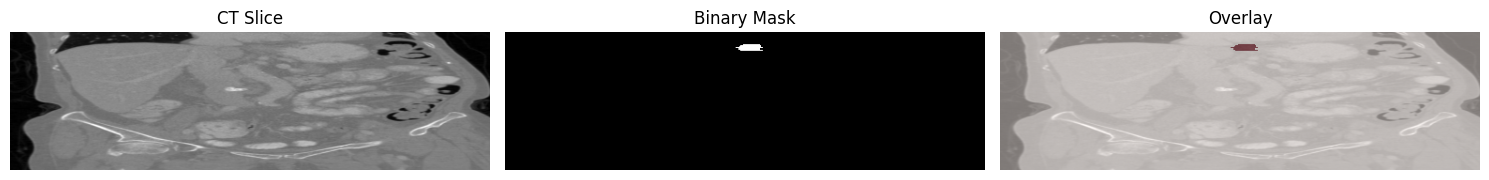

In [3]:
slice_2d, mask_2d, point_cloud, organ_label = bctv_dataset[0]
organ_name = BCTVAbdomenDataset.ORGAN_LABELS.get(organ_label, str(organ_label))
plot_slice_with_mask(slice_2d, mask_2d)

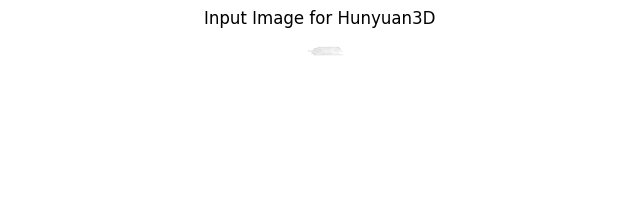

In [4]:
input_image = prepare_slice_for_hunyuan(
    slice_2d, mask_2d,
    use_mask_overlay=True,
    rotate=True
)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(input_image)
plt.title('Input Image for Hunyuan3D')
plt.axis('off')
plt.show()

## 2. MSD Dataset

Iterates over all tumor classes per scan.

In [5]:
# Load MSD dataset (all classes, coronal plane)
msd_dataset = MSDDataset(root_dir="data/", split="train", plane="coronal")
print(f"MSD: {len(msd_dataset)} samples (scan x class combinations)")

MSD: 19 samples (scan x class combinations)


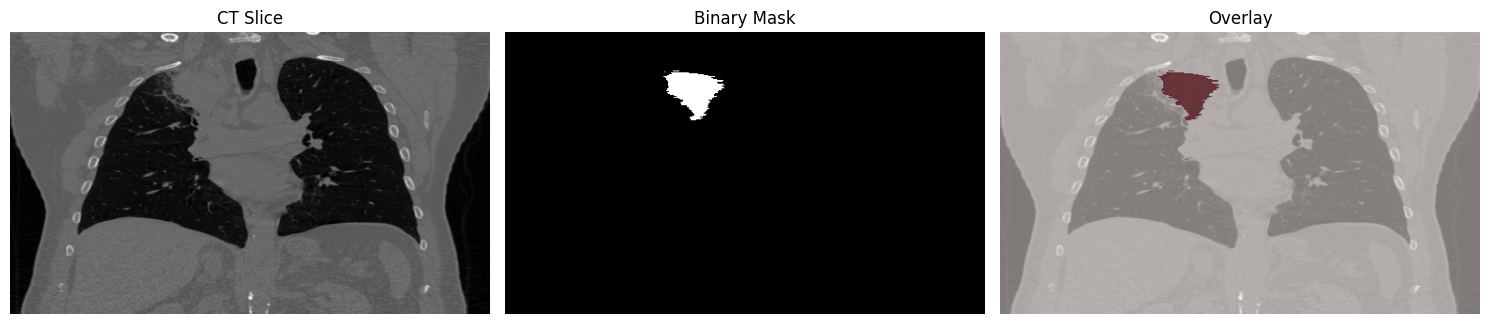

In [6]:
# Visualize first sample from MSD with cropped region and 3D
slice_2d, mask_2d, point_cloud, class_label = msd_dataset[0]
plot_slice_with_mask(slice_2d, mask_2d)

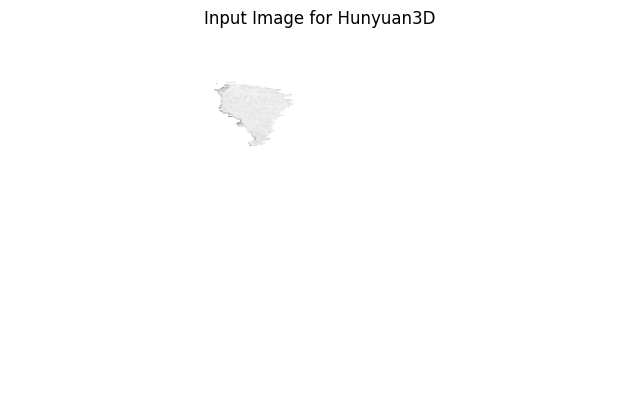

In [7]:
input_image = prepare_slice_for_hunyuan(
    slice_2d, mask_2d,
    use_mask_overlay=True,
    rotate=True
)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(input_image)
plt.title('Input Image for Hunyuan3D')
plt.axis('off')
plt.show()

## 3. AeroPath Dataset

Iterates over both airways and lungs mask types per patient.

In [8]:
# Load AeroPath dataset (all mask types: airways + lungs)
aeropath_dataset = AeroPathDataset(root_dir="data/", plane="coronal")
print(f"AeroPath: {len(aeropath_dataset)} samples (patient x mask_type combinations)")
print(f"Mask types: {AeroPathDataset.MASK_TYPES}")

AeroPath: 54 samples (patient x mask_type combinations)
Mask types: {'airways': 'Airways', 'lungs': 'Lungs'}


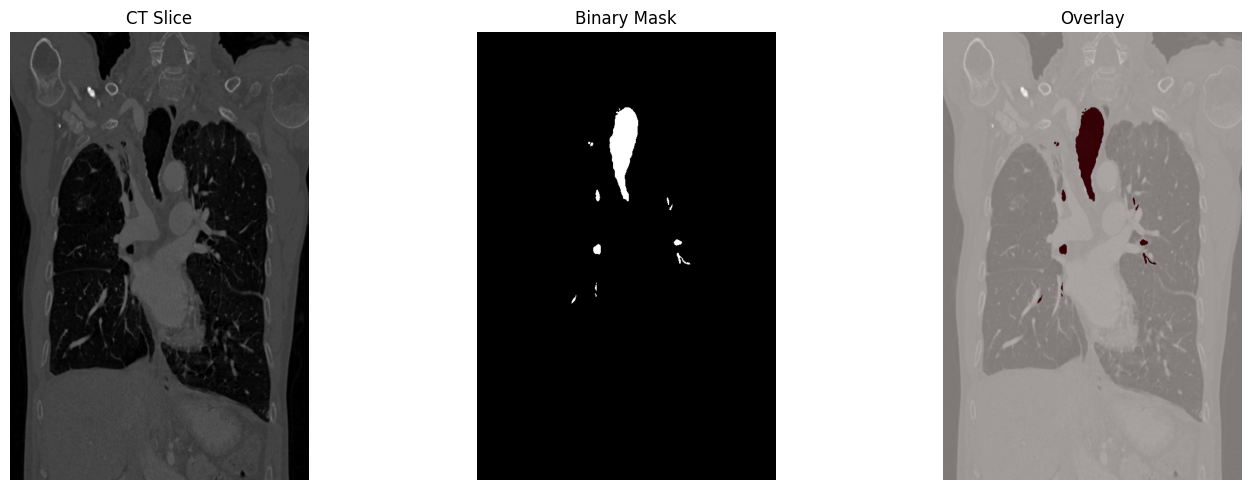

In [9]:
# Visualize first sample from AeroPath with cropped region and 3D
slice_2d, mask_2d, point_cloud, mask_type = aeropath_dataset[0]
mask_name = AeroPathDataset.MASK_TYPES.get(mask_type, mask_type)
plot_slice_with_mask(slice_2d, mask_2d)

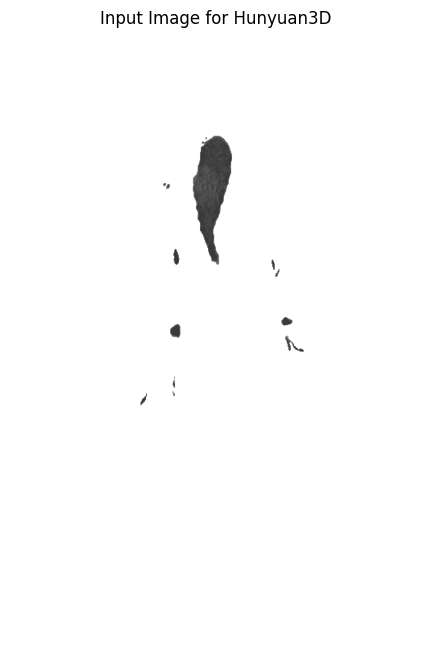

In [10]:
input_image = prepare_slice_for_hunyuan(
    slice_2d, mask_2d,
    use_mask_overlay=True,
    rotate=True
)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(input_image)
plt.title('Input Image for Hunyuan3D')
plt.axis('off')
plt.show()